# Learning Some Geometric/Clifford Algebra
>  It's about time

- toc: true 
- badges: true
- comments: true
- author: Scott H. Hawley
- image: images/cliffords.png

--- 

### *Work in progress / Still writing this one!*  Oct 15, 2021

---

This notebook is ripped out of the `clifford` documentation: https://clifford.readthedocs.io/. and then extended.

Motivated by [this paper](https://arxiv.org/abs/2110.04176) and the fact that I never liked Dirac spinors or Pauli matrices. 

Other references I like:

* [Slehars' blog post](https://slehar.wordpress.com/2014/03/18/clifford-algebra-a-visual-introduction/comment-page-2/?unapproved=1590&moderation-hash=571d6eb02d897393899feffd4dddca41#comment-1590)

* [This 3blue1brown-*style* video](https://www.youtube.com/watch?v=60z_hpEAtD8):

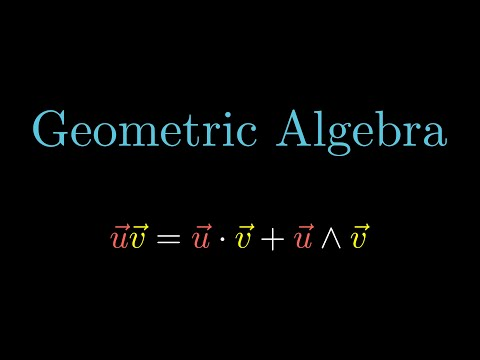

In [81]:
# hide
from IPython.display import HTML, YouTubeVideo
YouTubeVideo('60z_hpEAtD8')

* [This very handy list of properties](http://wackerart.de/mathematik/clifford_algebra.html)
* [These slides](https://www.ime.unicamp.br/~agacse2018/GA_Lecture1.pdf)
* [This paper](https://arxiv.org/pdf/2006.06507.pdf)
* [John Denker's write-up](https://www.av8n.com/physics/clifford-intro.pdf)
* [This chapter](https://link.springer.com/chapter/10.1007/978-3-319-57027-3_6)
* [Something Twitter-y?](https://drive.google.com/file/d/15fTvrmP-Fht-u5iMMsq-4ie-7yEcgOcA/view)
* [PyTorch Quaternion Neural Networks](https://github.com/TParcollet/Quaternion-Neural-Networks)

--- 


This notebook gives a terse introduction to using the `clifford` module, using a two-dimensional geometric algebra  as the context.

## Setup

First, import clifford and instantiate a two-dimensional algebra (G2),

In [1]:
%pip install clifford -Uqq

Note: you may need to restart the kernel to use updated packages.


In [2]:
import clifford as cf

layout, blades = cf.Cl(2) # creates a 2-dimensional clifford algebra

Inspect blades.

In [3]:
blades 

{'': 1, 'e1': (1^e1), 'e2': (1^e2), 'e12': (1^e12)}

Assign blades to variables

In [4]:
e1 = blades['e1']
e2 = blades['e2']
e12 = blades['e12']

## Basics

In [5]:
e1*e2  # geometric product

(1^e12)

In [6]:
e1|e2  # inner product 

0

In [7]:
e1^e2  # outer product

(1^e12)

## Reflection 

In [8]:
a = e1+e2     # the vector
n = e1        # the reflector
-n*a*n.inv()  # reflect `a` in hyperplane normal to `n`

-(1.0^e1) + (1.0^e2)

## Rotation

In [9]:
from math import e, pi

R = e**(pi/4*e12)  # enacts rotation by pi/2 
R

0.70711 + (0.70711^e12)

In [10]:
R*e1*~R    # rotate e1 by pi/2 in the e12-plane

-(1.0^e2)

In [11]:
import math

In [12]:
a_ = 2*e1 + e2
b_ = 0.7*(e1 + 2*e2)

Define non-orthogonal unit vectors a and b:

In [13]:
def unit(v):
    return v / math.sqrt(v*v)

a = unit(a_)
b = unit(b_)

In [14]:
a, b

((0.89443^e1) + (0.44721^e2), (0.44721^e1) + (0.89443^e2))

In [15]:
b*a*b

-(0.17889^e1) + (0.98387^e2)

In [16]:
a*b*a

(0.98387^e1) - (0.17889^e2)

... so a*b*a is b*a*b rotated by 90 degrees.

Here are two different versions of b:

In [17]:
b*a*a

(0.44721^e1) + (0.89443^e2)

In [18]:
a*a*b

(0.44721^e1) + (0.89443^e2)

....Note that in 2D, "trivectors" (e.g., $baa$ or $abb$ or $aab$) *don't exist as trivectors*.  A vector times a bivector is a vector (in 2D). 


Checking associativity:

In [19]:
(b*a)*b

-(0.17889^e1) + (0.98387^e2)

In [20]:
b*(a*b)

-(0.17889^e1) + (0.98387^e2)

And if we reverse the order we pick up a term of 2a^b:

In [21]:
((a*b)-2*(a^b))*b

-(0.17889^e1) + (0.98387^e2)

Are wedge and geometric product associative?

In [22]:
(a^b)*b

(0.53666^e1) - (0.26833^e2)

In [23]:
a^(b*b)

(0.89443^e1) + (0.44721^e2)

....seems that they are not.  What then is the proper order of operations?  Left to right or does vector product take precedence?

In [24]:
a*b

0.8 + (0.6^e12)

In [25]:
b*a

0.8 - (0.6^e12)

In [26]:
(a|b) - (a^b)

0.8 - (0.6^e12)

In [27]:
(a*b) - 2*(a^b)

0.8 - (0.6^e12)

In [28]:
c = (b*a)*b; c  # c = bab

-(0.17889^e1) + (0.98387^e2)

In [29]:
c - b*a*b

0

In [30]:
d = (-a*b)*b; d  # d = -abb = -a(b^2)  != c = bab

-(0.89443^e1) - (0.44721^e2)

In [31]:
d - (-a)

0

In [32]:
e = a*b*a; e  #  e = aba 

(0.98387^e1) - (0.17889^e2)

In [33]:
%pip install matplotlib -Uqq

Note: you may need to restart the kernel to use updated packages.


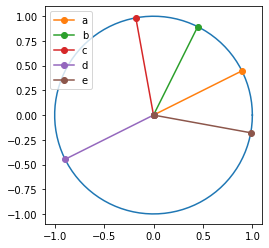

In [34]:
import matplotlib.pyplot as plt
import string
import numpy as np 

def doplot(v_list:list, labels=list(string.ascii_lowercase), loc='upper left'):
    t = np.linspace(0,2*np.pi,num=100)
    circle_x, circle_y = np.cos(t), np.sin(t)
    plt.plot(circle_x, circle_y)

    for i,v in enumerate(v_list):
        x, y = e1|v, e2|v
        plt.plot((0,x),(0,y),'o-',label=labels[i])
        #plt.axis([-1, 1, -1, 1])
        plt.gca().set_aspect('equal')
        plt.legend(loc=loc)
    

doplot([a,b,c,d,e])

Note that $ba$ performs a rotation by the angle amount from $a$ to $b$, then applied to whatever comes after. so $baf$ takes $f$ and rotates by the angle you subtend when you go from $a$ to $b$

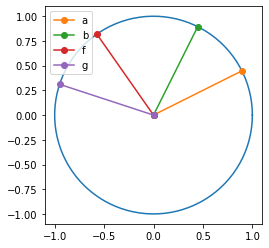

In [35]:
f = unit(-.7*e1 + e2)  # just some other vector
g = b*a*f
doplot([a,b,f,g], labels=['a','b','f','g'])

And (at least for unit vectors) this is the same as hitting the $f$ on the other side, and reversing the order of $a$ and $b$:

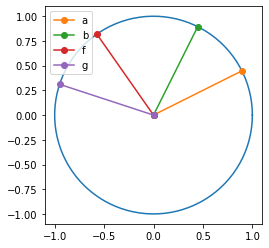

In [36]:
f = unit(-.7*e1 + e2)  # just some other vector
g = f*a*b
doplot([a,b,f,g], labels=['a','b','f','g'])

Permuting all three indices gives you the same result:

In [37]:
f*a*b - b*a*f

0

similarly:

In [38]:
d*c*a - a*c*d

0

Switching the order of the last one compared to a wedge (without permuting the wedge) gives you a minus sign:

In [39]:
(a^b)*f

(0.49154^e1) + (0.34408^e2)

In [40]:
f*(a^b)

-(0.49154^e1) - (0.34408^e2)

In [41]:
e1*(a^b)

(0.6^e2)

In [42]:
(a^b)*e1

-(0.6^e2)

In [43]:
e1^e2

(1^e12)

In [44]:
a^b

(0.6^e12)

In [45]:
a|b

0.8

In [46]:
a,b

((0.89443^e1) + (0.44721^e2), (0.44721^e1) + (0.89443^e2))

In [47]:
e1^e1

0

In [48]:
(a|e1)*(b|e2) - (a|e2)*(b|e1)

0.6

### Proving why f\*e12 = - e12\*f:

In [49]:
f*e12

-(0.81923^e1) - (0.57346^e2)

In [50]:
e12*f

(0.81923^e1) + (0.57346^e2)

In [51]:
f*e12 - (- e12*f)

0

In [52]:
f

-(0.57346^e1) + (0.81923^e2)

In [53]:
e1*e12

(1^e2)

In [54]:
e12*e1

-(1^e2)

In [55]:
f*e1

-0.57346 - (0.81923^e12)

= f1 + (f2 e2^e1) = f1 - f2 e1^e2  = $f_1 - f_2 e_{12}$  $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$[1]

In [56]:
e2*f

0.81923 + (0.57346^e12)

= f2 + e2^f1e1 = f2 -f1 e1^e2 =  $f_2 - f_1 e_{12}$  $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$[2]

In [57]:
e1*(e2*f)

(0.81923^e1) + (0.57346^e2)

= e1([2]) = e1 f2 e1(-f1e12) = $f_2 e_1 - f_1 e_2$ $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$[3]

In [58]:
(f*e1)*e2

-(0.81923^e1) - (0.57346^e2)

= [1] e2 = (  f1 - f2 e12 ) fe2   = $-f_2 e_1 + f_1 e_2 $ $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$[4] = - [3]

$\therefore$ f e1 e2 = - e1 e2 f 

In [59]:
import numpy as np
def rndvec():
    return (2*np.random.rand()-1)*e1 + (2*np.random.rand()-1)*e2 

In [60]:
u, v, w = [rndvec() for x in range(3)]; u, v, w

((0.31584^e1) + (0.82423^e2),
 -(0.11068^e1) - (0.53066^e2),
 -(0.05997^e1) - (0.95982^e2))

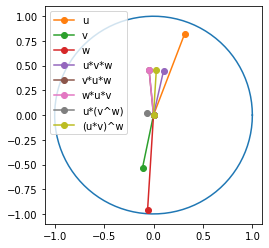

In [61]:
doplot([u,v,w,u*v*w,v*u*w,w*u*v,u*(v^w),(u*v)^w], labels=['u','v','w','u*v*w','v*u*w','w*u*v','u*(v^w)','(u*v)^w'],loc='upper left')

In the above, vuw (brown) and wuv (pink) are on top of each other, i.e. swapping the first and third vectors produces no change:

In [62]:
v*u*w - w*u*v

0

## Kinds of products
Paper uses "Kronecker Product".  Which is like "tensor product". Which is like "outer product". But is *different from* "exterior product" because math history.  But the latter is the same as the wedge product. Yes?

In [63]:
A = np.array([[1,2,3],[4,5,6]]); A

array([[1, 2, 3],
       [4, 5, 6]])

In [64]:
B = np.array([[-0.1,.2,.3],[.4,-.5,.6]]); B

array([[-0.1,  0.2,  0.3],
       [ 0.4, -0.5,  0.6]])

In [65]:
A.T @ B

array([[ 1.5, -1.8,  2.7],
       [ 1.8, -2.1,  3.6],
       [ 2.1, -2.4,  4.5]])

In [66]:
np.dot(A.T,B)

array([[ 1.5, -1.8,  2.7],
       [ 1.8, -2.1,  3.6],
       [ 2.1, -2.4,  4.5]])

In [67]:
np.matmul(A.T,B)

array([[ 1.5, -1.8,  2.7],
       [ 1.8, -2.1,  3.6],
       [ 2.1, -2.4,  4.5]])

In [68]:
B.T @ A

array([[ 1.5,  1.8,  2.1],
       [-1.8, -2.1, -2.4],
       [ 2.7,  3.6,  4.5]])

In [69]:
np.outer(A,B)

array([[-0.1,  0.2,  0.3,  0.4, -0.5,  0.6],
       [-0.2,  0.4,  0.6,  0.8, -1. ,  1.2],
       [-0.3,  0.6,  0.9,  1.2, -1.5,  1.8],
       [-0.4,  0.8,  1.2,  1.6, -2. ,  2.4],
       [-0.5,  1. ,  1.5,  2. , -2.5,  3. ],
       [-0.6,  1.2,  1.8,  2.4, -3. ,  3.6]])

In [70]:
np.outer(B,A)

array([[-0.1, -0.2, -0.3, -0.4, -0.5, -0.6],
       [ 0.2,  0.4,  0.6,  0.8,  1. ,  1.2],
       [ 0.3,  0.6,  0.9,  1.2,  1.5,  1.8],
       [ 0.4,  0.8,  1.2,  1.6,  2. ,  2.4],
       [-0.5, -1. , -1.5, -2. , -2.5, -3. ],
       [ 0.6,  1.2,  1.8,  2.4,  3. ,  3.6]])

In [71]:
x = np.random.rand(3); x

array([0.31925391, 0.55783742, 0.47812046])

In [72]:
y = np.random.rand(3); y

array([0.76900281, 0.53140229, 0.49368754])

In [73]:
x @ y

0.7779853474964019

In [74]:
np.outer(x,y)

array([[0.24550716, 0.16965226, 0.15761168],
       [0.42897854, 0.29643608, 0.27539738],
       [0.36767597, 0.2540743 , 0.23604211]])

In [75]:
np.outer(y,x)

array([[0.24550716, 0.42897854, 0.36767597],
       [0.16965226, 0.29643608, 0.2540743 ],
       [0.15761168, 0.27539738, 0.23604211]])

In [76]:
(np.outer(x,y) - np.outer(y,x))/2

array([[ 0.        , -0.12966314, -0.10503215],
       [ 0.12966314,  0.        ,  0.01066154],
       [ 0.10503215, -0.01066154,  0.        ]])

In [77]:
u^v^w

0

In [78]:
(u*v*w) + (v*w*u) + (w*u*v)

(0.28095^e1) + (1.30851^e2)